In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats 
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as st
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\Claus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Dhunche

In [2]:
dhunche_raw=pd.read_csv('precip/prec_Dhunche.csv',na_values=-99.9)
dhunche_raw['Time']=pd.to_datetime(dhunche_raw['Time'])

#display(dhunche_raw)

#### Clean dataset

In [3]:
idx_first_non_nan=dhunche_raw['Precipitation (mm)'].first_valid_index()
display(idx_first_non_nan)
dhunche_raw['Time'].iloc[973]

973

Timestamp('1994-09-01 00:00:00')

##### We want full years, so we locate the first year with valid values, which is 1995:

In [4]:
idx_1995=dhunche_raw[dhunche_raw.Time.dt.year==1995].index.values.astype(int)
#display(idx_1995)

So the index for the first point in year 1995 is [1095]. We make new dataframe from 1995

In [5]:
dhunche=dhunche_raw[1095:]
#display(dhunche.head())

##### Group by annual means

In [6]:
dhunche_annual=dhunche.groupby(dhunche.Time.dt.year).mean()
#display(dhunche_annual)

### Plot

#### Make index to column

In [7]:
dhunche_annual['Year']=dhunche_annual.index
dhunche_annual['Precip']=dhunche_annual['Precipitation (mm)']
#display(dhunche_annual)

#### Make trend line with linear regression

In [60]:
lin_reg_dhunche = smf.ols(formula='Precip ~ Year',data=dhunche_annual).fit()
#lin_reg_dhunche.summary()

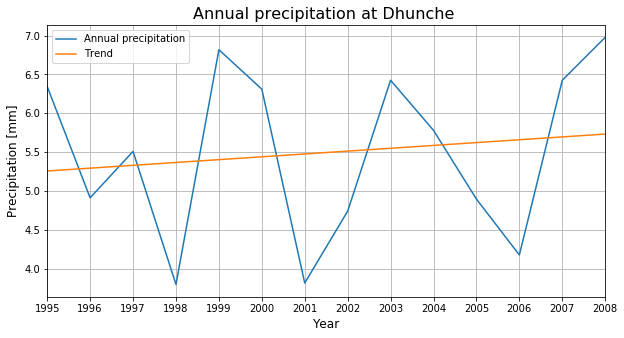

In [9]:
slope_dhunche = lin_reg_dhunche.params[1]
intercept_dhunche = lin_reg_dhunche.params[0]
plt.figure(figsize=(10,5))
plt.plot(dhunche_annual['Year'], dhunche_annual['Precip'], label='Annual precipitation')
plt.plot(dhunche_annual['Year'], dhunche_annual['Year']*slope_dhunche+intercept_dhunche, label='Trend')
plt.xlim(1995,2008)
plt.xticks(np.arange(1995,2009,1))
plt.title('Annual precipitation at Dhunche ', size=16)
plt.xlabel('Year', size = 12)
plt.ylabel('Precipitation [mm]', size = 12)
plt.legend()
plt.grid(True)
plt.show()

#### Test if trend is significant for $\alpha$ = 0.05

Here we test for significance trend of the linear regression $X_i = a + bT_i$,  where we test for the slope $b$, with the null hypothsis: $H_0$: $b$ = 0 and alternative hypothesis $H_a$: $b \neq 0$.

Test statistic $t = \frac{b-0}{s_b}$, this value we can read of the linear regression model with lin_reg.tvalues[1]

$H_0$ is rejected if $|t| \geq t_{1-\alpha/2,n-2}$ which mean that $b$ is significantally different from zero.

In [68]:
alpha = 0.05
n = len(dhunche_annual['Year'])

t_value = scipy.stats.t.ppf((1-alpha/2),n-2)

t_stat = lin_reg_dhunche.tvalues[1]

display(t_value)
display(t_stat)
#display(n)

print('t_slope: {}, t_value: {}'.format(t_stat.round(2) , t_value.round(2)))

2.1788128296634177

0.4844284843175407

t_slope: 0.48, t_value: 2.18


$|t| < t_{1-\alpha/2,n-2}$, so we can not reject $H_0$, therefore the trend is not significant

### Monthly average (bar plot)

In [10]:
label = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

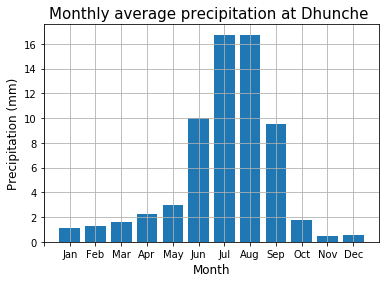

In [11]:
dhunche_month=dhunche.groupby(dhunche.Time.dt.month).mean()
time_dhunche=dhunche_month.index
monthly_prec_dhunche=dhunche_month['Precipitation (mm)']
plt.bar(time_dhunche,monthly_prec_dhunche)
plt.title('Monthly average precipitation at Dhunche ', size =15)
plt.xlabel('Month', size = 12)
plt.ylabel('Precipitation (mm)', size = 12)
plt.xticks(x,label)
plt.grid(True)
plt.show()

## Lete

In [12]:
lete_raw=pd.read_csv('precip/prec_Lete.csv',na_values=-99.9)
lete_raw['Time']=pd.to_datetime(lete_raw['Time'])
#display(lete_raw)

#### Clean dataset

In [13]:
idx_first_non_nan=lete_raw['Precipitation (mm)'].first_valid_index()
#display(idx_first_non_nan)

In [14]:
lete_raw['Time'].iloc[138]

Timestamp('1969-05-19 00:00:00')

##### We want full years, so we locate the first year with valid values, which is 1970:

In [15]:
idx_1970_lete=lete_raw[lete_raw.Time.dt.year==1970].index.values.astype(int)
#display(idx_1970_lete)

#### So the index for the first point in year 1970 is [365]. We make new dataframe from 1970

In [16]:
lete=lete_raw[365:]
#display(lete.head())

##### Group by annual means

In [17]:
lete_annual=lete.groupby(lete.Time.dt.year).mean()
#display(lete_annual)

### Plot

#### Make index to column

In [18]:
lete_annual['Year']=lete_annual.index
lete_annual['Precip']=lete_annual['Precipitation (mm)']
#display(lete_annual)

#### Make trend line with linear regression

In [19]:
lin_reg_lete = smf.ols(formula='Precip ~ Year',data=lete_annual).fit()
#lin_reg_lete.summary()

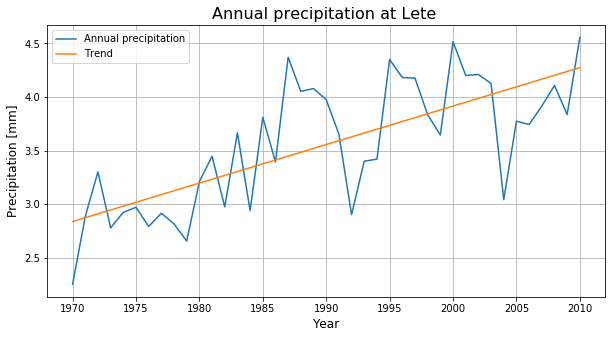

In [20]:
slope_lete = lin_reg_lete.params[1]
intercept_lete = lin_reg_lete.params[0]
plt.figure(figsize=(10,5))
plt.plot(lete_annual['Year'], lete_annual['Precip'], label='Annual precipitation')
plt.plot(lete_annual['Year'], lete_annual['Year']*slope_lete+intercept_lete, label='Trend')
#plt.xlim(1995,2008)
#plt.xticks(np.arange(1995,2009,1))
plt.title('Annual precipitation at Lete ', size=16)
plt.xlabel('Year', size = 12)
plt.ylabel('Precipitation [mm]', size = 12)
plt.legend()
plt.grid(True)
plt.show()

#### Test if trend is significant for $\alpha$ = 0.05

Here we test for significance trend of the linear regression $X_i = a + bT_i$,  where we test for the slope $b$, with the null hypothsis: $H_0$: $b$ = 0 and alternative hypothesis $H_a$: $b \neq 0$.

Test statistic $t = \frac{b-0}{s_b}$, this value we can read of the linear regression model with lin_reg.tvalues[1]

$H_0$ is rejected if $|t| \geq t_{1-\alpha/2,n-2}$ which mean that $b$ is significantally different from zero.

In [69]:
alpha = 0.05
n = len(lete_annual['Year'])

t_value = scipy.stats.t.ppf((1-alpha/2),n-2)

t_stat = lin_reg_lete.tvalues[1]

display(t_value)
display(t_stat)
#display(n)

print('t_slope: {}, t_value: {}'.format(t_stat.round(2) , t_value.round(2)))

2.022690911734728

6.536489574914185

t_slope: 6.54, t_value: 2.02


$|t| > t_{1-\alpha/2,n-2}$, so we can reject $H_0$, therefore the trend is significant.

### Monthly average (bar plot)

In [21]:
label = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

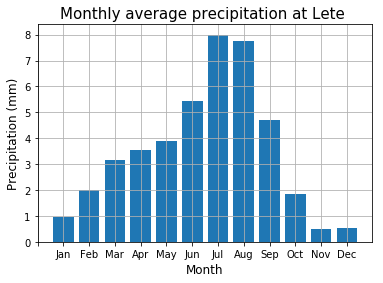

In [22]:
lete_month=lete.groupby(lete.Time.dt.month).mean()
time_lete=lete_month.index
monthly_prec_lete=lete_month['Precipitation (mm)']
plt.bar(time_lete,monthly_prec_lete)
plt.title('Monthly average precipitation at Lete ', size =15)
plt.xlabel('Month', size = 12)
plt.ylabel('Precipitation (mm)', size = 12)
plt.xticks(x,label)
plt.grid(True)
plt.show()

## Lumle

In [23]:
lumle_raw=pd.read_csv('precip/prec_Lumle.csv',na_values=-99.9)
lumle_raw['Time']=pd.to_datetime(lumle_raw['Time'])
#display(lumle_raw)

#### Clean dataset

In [24]:
idx_first_non_nan=lumle_raw['Precipitation (mm)'].first_valid_index()
#display(idx_first_non_nan)

In [25]:
lumle_raw['Time'].iloc[320]

Timestamp('1969-11-17 00:00:00')

##### We want full years, so we locate the first year with valid values, which is 1970:

In [26]:
idx_1970_lumle=lumle_raw[lumle_raw.Time.dt.year==1970].index.values.astype(int)
#display(idx_1970_lumle)

#### So the index for the first point in year 1970 is [365]. We make new dataframe from 1970

In [27]:
lumle=lumle_raw[365:]
#display(lumle.head())

##### Group by annual means

In [28]:
lumle_annual=lumle.groupby(lumle.Time.dt.year).mean()
#display(lumle_annual)

### Plot

#### Make index to column

In [29]:
lumle_annual['Year']=lumle_annual.index
lumle_annual['Precip']=lumle_annual['Precipitation (mm)']
#display(lumle_annual)

#### Make trend line with linear regression

In [30]:
lin_reg_lumle = smf.ols(formula='Precip ~ Year',data=lumle_annual).fit()
#lin_reg_lumle.summary()

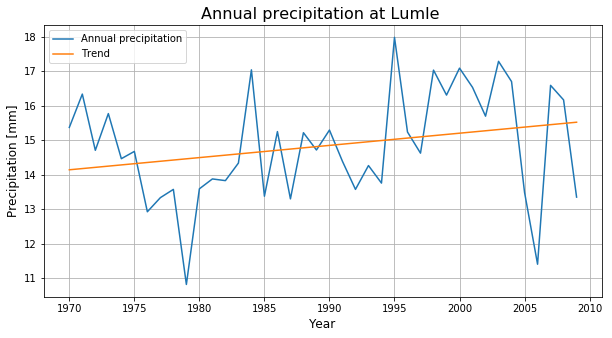

In [31]:
slope_lumle = lin_reg_lumle.params[1]
intercept_lumle = lin_reg_lumle.params[0]
plt.figure(figsize=(10,5))
plt.plot(lumle_annual['Year'], lumle_annual['Precip'], label='Annual precipitation')
plt.plot(lumle_annual['Year'], lumle_annual['Year']*slope_lumle+intercept_lumle, label='Trend')
#plt.xlim(1995,2008)
#plt.xticks(np.arange(1995,2009,1))
plt.title('Annual precipitation at Lumle ', size=16)
plt.xlabel('Year', size = 12)
plt.ylabel('Precipitation [mm]', size = 12)
plt.legend()
plt.grid(True)
plt.show()

#### Test if trend is significant for $\alpha$ = 0.05

Here we test for significance trend of the linear regression $X_i = a + bT_i$,  where we test for the slope $b$, with the null hypothsis: $H_0$: $b$ = 0 and alternative hypothesis $H_a$: $b \neq 0$.

Test statistic $t = \frac{b-0}{s_b}$, this value we can read of the linear regression model with lin_reg.tvalues[1]

$H_0$ is rejected if $|t| \geq t_{1-\alpha/2,n-2}$ which mean that $b$ is significantally different from zero.

In [70]:
alpha = 0.05
n = len(lumle_annual['Year'])

t_value = scipy.stats.t.ppf((1-alpha/2),n-2)

t_stat = lin_reg_lumle.tvalues[1]

display(t_value)
display(t_stat)
#display(n)

print('t_slope: {}, t_value: {}'.format(t_stat.round(2) , t_value.round(2)))

2.024394164575136

1.6467254868713046

t_slope: 1.65, t_value: 2.02


$|t| < t_{1-\alpha/2,n-2}$, so we can not reject $H_0$, therefore the trend is not significant

### Monthly average (bar plot)

In [32]:
label = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

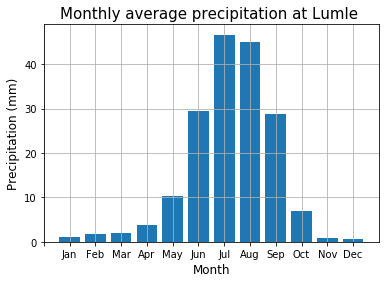

In [33]:
lumle_month=lumle.groupby(lumle.Time.dt.month).mean()
time_lumle=lumle_month.index
monthly_prec_lumle=lumle_month['Precipitation (mm)']
plt.bar(time_lumle,monthly_prec_lumle)
plt.title('Monthly average precipitation at Lumle ', size =15)
plt.xlabel('Month', size = 12)
plt.ylabel('Precipitation (mm)', size = 12)
plt.xticks(x,label)
plt.grid(True)
plt.show()

## Pohara

In [34]:
pohara_raw=pd.read_csv('precip/prec_Pohara.csv',na_values=-99.9)
pohara_raw['Time']=pd.to_datetime(pohara_raw['Time'])
#display(pohara_raw)

#### Clean dataset

In [35]:
idx_first_non_nan=pohara_raw['Precipitation (mm)'].first_valid_index()
#display(idx_first_non_nan)

In [36]:
pohara_raw['Time'].iloc[0]

Timestamp('1968-01-01 00:00:00')

#### All the first value is valid so we can run full dataset

In [37]:
idx_1968_pohara=pohara_raw[pohara_raw.Time.dt.year==1968].index.values.astype(int)
#display(idx_1968_pohara)

In [38]:
pohara=pohara_raw
#display(pohara.head())

##### Group by annual means

In [39]:
pohara_annual=pohara.groupby(pohara.Time.dt.year).mean()
#display(pohara_annual)

### Plot

#### Make index to column

In [40]:
pohara_annual['Year']=pohara_annual.index
pohara_annual['Precip']=pohara_annual['Precipitation (mm)']
#display(pohara_annual)

#### Make trend line with linear regression

In [41]:
lin_reg_pohara = smf.ols(formula='Precip ~ Year',data=pohara_annual).fit()
#lin_reg_pohara.summary()

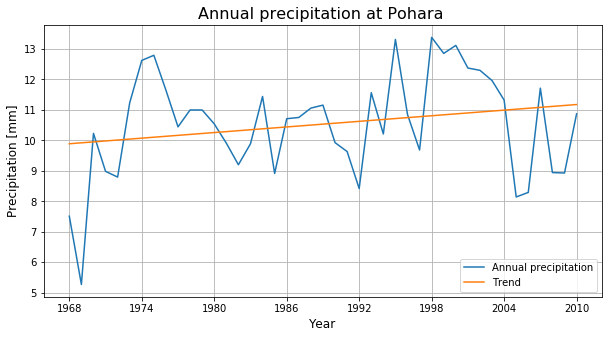

In [42]:
slope_pohara = lin_reg_pohara.params[1]
intercept_pohara = lin_reg_pohara.params[0]
plt.figure(figsize=(10,5))
plt.plot(pohara_annual['Year'], pohara_annual['Precip'], label='Annual precipitation')
plt.plot(pohara_annual['Year'], pohara_annual['Year']*slope_pohara+intercept_pohara, label='Trend')

plt.xticks(np.arange(1968,2011,6))
plt.title('Annual precipitation at Pohara ', size=16)
plt.xlabel('Year', size = 12)
plt.ylabel('Precipitation [mm]', size = 12)
plt.legend()
plt.grid(True)
plt.show()

#### Test if trend is significant for $\alpha$ = 0.05

Here we test for significance trend of the linear regression $X_i = a + bT_i$,  where we test for the slope $b$, with the null hypothsis: $H_0$: $b$ = 0 and alternative hypothesis $H_a$: $b \neq 0$.

Test statistic $t = \frac{b-0}{s_b}$, this value we can read of the linear regression model with lin_reg.tvalues[1]

$H_0$ is rejected if $|t| \geq t_{1-\alpha/2,n-2}$ which mean that $b$ is significantally different from zero.

In [71]:
alpha = 0.05
n = len(pohara_annual['Year'])

t_value = scipy.stats.t.ppf((1-alpha/2),n-2)

t_stat = lin_reg_pohara.tvalues[1]

display(t_value)
display(t_stat)
#display(n)

print('t_slope: {}, t_value: {}'.format(t_stat.round(2) , t_value.round(2)))

2.0195409639828936

1.47847665652499

t_slope: 1.48, t_value: 2.02


$|t| < t_{1-\alpha/2,n-2}$, so we can not reject $H_0$, therefore the trend is not significant

### Monthly average (bar plot)

In [43]:
label = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

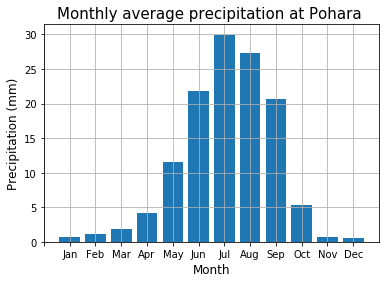

In [44]:
pohara_month=pohara.groupby(pohara.Time.dt.month).mean()
time_pohara=pohara_month.index
monthly_prec_pohara=pohara_month['Precipitation (mm)']
plt.bar(time_pohara,monthly_prec_pohara)
plt.title('Monthly average precipitation at Pohara ', size =15)
plt.xlabel('Month', size = 12)
plt.ylabel('Precipitation (mm)', size = 12)
plt.xticks(x,label)
plt.grid(True)
plt.show()

## Rampur

In [45]:
rampur_raw=pd.read_csv('precip/prec_Rampur.csv',na_values=-99.9)
rampur_raw['Time']=pd.to_datetime(rampur_raw['Time'])
#display(rampur_raw)

#### Clean dataset

In [46]:
idx_first_non_nan=rampur_raw['Precipitation (mm)'].first_valid_index()
#display(idx_first_non_nan)

In [47]:
rampur_raw['Time'].iloc[90]

Timestamp('1967-04-01 00:00:00')

##### We want full years, so we locate the first year with valid values, which is 1968:

In [48]:
idx_1968_rampur=rampur_raw[rampur_raw.Time.dt.year==1968].index.values.astype(int)
#display(idx_1968_rampur)

In [49]:
rampur=rampur_raw[365:]
#display(rampur.head())

##### Group by annual means

In [50]:
rampur_annual=rampur.groupby(rampur.Time.dt.year).mean()
#display(pohara_annual)

### Plot

#### Make index to column

In [51]:
rampur_annual['Year']=rampur_annual.index
rampur_annual['Precip']=rampur_annual['Precipitation (mm)']
#display(pohara_annual)

#### Make trend line with linear regression

In [61]:
lin_reg_rampur = smf.ols(formula='Precip ~ Year',data=rampur_annual).fit()
#lin_reg_rampur.summary()

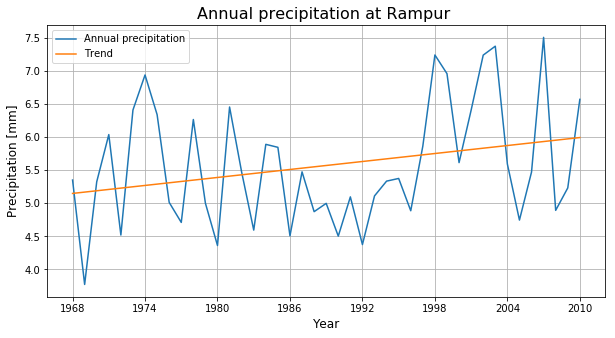

In [53]:
slope_rampur = lin_reg_rampur.params[1]
intercept_rampur = lin_reg_rampur.params[0]
plt.figure(figsize=(10,5))
plt.plot(rampur_annual['Year'], rampur_annual['Precip'], label='Annual precipitation')
plt.plot(rampur_annual['Year'], rampur_annual['Year']*slope_rampur+intercept_rampur, label='Trend')

plt.xticks(np.arange(1968,2011,6))
plt.title('Annual precipitation at Rampur ', size=16)
plt.xlabel('Year', size = 12)
plt.ylabel('Precipitation [mm]', size = 12)
plt.legend()
plt.grid(True)
plt.show()

#### Test if trend is significant for $\alpha$ = 0.05

Here we test for significance trend of the linear regression $X_i = a + bT_i$,  where we test for the slope $b$, with the null hypothsis: $H_0$: $b$ = 0 and alternative hypothesis $H_a$: $b \neq 0$.

Test statistic $t = \frac{b-0}{s_b}$, this value we can read of the linear regression model with lin_reg.tvalues[1]

$H_0$ is rejected if $|t| \geq t_{1-\alpha/2,n-2}$ which mean that $b$ is significantally different from zero.

In [72]:
alpha = 0.05
n = len(rampur_annual['Year'])

t_value = scipy.stats.t.ppf((1-alpha/2),n-2)

t_stat = lin_reg_rampur.tvalues[1]

display(t_value)
display(t_stat)
#display(n)

print('t_slope: {}, t_value: {}'.format(t_stat.round(2) , t_value.round(2)))

2.0195409639828936

1.8109165431170569

t_slope: 1.81, t_value: 2.02


$|t| < t_{1-\alpha/2,n-2}$, so we can not reject $H_0$, therefore the trend is not significant

### Monthly average (bar plot)

In [54]:
label = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

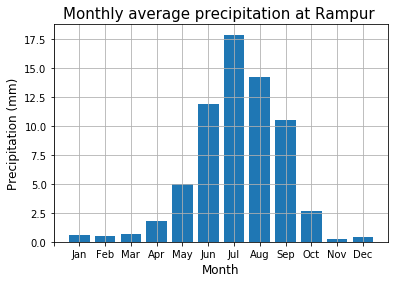

In [55]:
rampur_month=rampur.groupby(rampur.Time.dt.month).mean()
time_rampur=rampur_month.index
monthly_prec_rampur=rampur_month['Precipitation (mm)']
plt.bar(time_rampur,monthly_prec_rampur)
plt.title('Monthly average precipitation at Rampur ', size =15)
plt.xlabel('Month', size = 12)
plt.ylabel('Precipitation (mm)', size = 12)
plt.xticks(x,label)
plt.grid(True)
plt.show()

#### For loop plot:

In [56]:
station_data=['precip/prec_Dhunche.csv','precip/prec_Lete.csv','precip/prec_Lumle.csv',
              'precip/prec_Pohara.csv','precip/prec_Pohara.csv','precip/prec_Rampur.csv']
type(station_data[1])

str

In [57]:
plt.figure()
for i in range(5):
    stat_raw=pd.read_csv(station_data[i],na_values=-99.9)
    stat_raw['Time']=pd.to_datetime(stat_raw['Time'])
    #idx_first_non_nan[i]=stat_raw[i]['Precipitation (mm)'].first_valid_index()
    #display(idx_first_non_nan)
    #stat_annual=stat_raw[idx[i]:].groupby(stat_raw.Time.dt.year).mean()
    stat_annual[i]['Year']=stat_annual[i].index
    stat_annual[i]['Precip']=stat_annual[i]['Precipitation (mm)']
    plt.plot(stat_annual)
    plt.show()

NameError: name 'stat_annual' is not defined